# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**AI-generated using dandi-notebook-gen**, unverified—exercise caution when interpreting code or results.

## Overview
This notebook shows how to:
- Load Dandiset metadata and assets with the DANDI API  
- Stream an NWB file remotely using remfile and PyNWB  
- Compute and display a contrast-stretched max projection image  
- Extract and plot an event amplitude time series for a selected ROI  

## Neurosift Link
https://neurosift.app/dandiset/001174

## Required Packages
`dandi`, `remfile`, `h5py`, `pynwb`, `numpy`, `matplotlib`

## Load Dandiset and List Assets

In [1]:
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001174")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 45 assets in the dataset

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb
- sub-Q/sub-Q_ophys.nwb
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb


## Select and Load NWB File
Choosing subject Q’s spontaneous condition file.

In [2]:
import remfile, h5py, pynwb

nwb_url = "https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/"
remote_file = remfile.File(nwb_url)
h5f = h5py.File(remote_file, mode="r")
io = pynwb.NWBHDF5IO(file=h5f, mode="r")
nwb = io.read()

print("Session description:", nwb.session_description)
print("Identifier:", nwb.identifier)
print("Session start time:", nwb.session_start_time)

Session description: Calcium imaging in SMA during the spontaneous condition
Identifier: 5c2c4bb2-8310-4e0e-ae01-fd872edba928
Session start time: 2022-09-15 13:16:33.129000+00:00


## Contrast-Stretched Max Projection
Compute a max projection over the first 100 frames and apply contrast stretching.

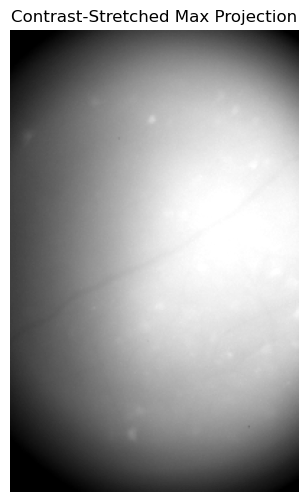

In [3]:
import numpy as np
import matplotlib.pyplot as plt

ops = nwb.acquisition["OnePhotonSeries"]
subset = ops.data[:100, :, :]
max_proj = np.max(subset, axis=0)

# 2nd–98th percentile stretch
p_low, p_high = np.percentile(max_proj, (2, 98))
stretched = np.clip((max_proj - p_low) / (p_high - p_low), 0, 1)

plt.figure(figsize=(6, 6))
plt.imshow(stretched, cmap="gray")
plt.title("Contrast-Stretched Max Projection")
plt.axis("off")
plt.show()

## Event Amplitude Time Series
Plot the first 1000 samples for ROI 0.

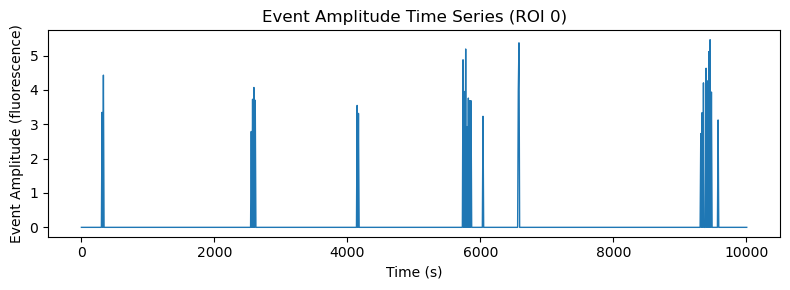

In [4]:
event_amp = nwb.processing["ophys"]["EventAmplitude"].data
rate = nwb.processing["ophys"]["EventAmplitude"].rate
start = nwb.processing["ophys"]["EventAmplitude"].starting_time or 0.0

roi = 0
n_points = min(1000, event_amp.shape[0])
time = start + np.arange(n_points) * rate
amp_series = event_amp[:n_points, roi]

plt.figure(figsize=(8, 3))
plt.plot(time, amp_series, lw=1)
plt.xlabel("Time (s)")
plt.ylabel("Event Amplitude (fluorescence)")
plt.title(f"Event Amplitude Time Series (ROI {roi})")
plt.tight_layout()
plt.show()

## Summary and Future Directions
- Loaded Dandiset 001174 metadata and assets via the DANDI API  
- Streamed an NWB file remotely and inspected metadata  
- Generated a contrast-stretched max projection to highlight footprints  
- Plotted an event amplitude trace for a single ROI  

**Future directions**  
- Compare fluorescence and event amplitude across multiple ROIs  
- Analyze synchrony between cell pairs  
- Integrate behavioral task timestamps for event-triggered analysis